In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson  # 泊松分布
from scipy.stats import skellam  # skellam分布

In [2]:
# 準備資料
competitionDict = {
    82: '英超', 
    108: '意甲',
    120: '德甲',
    129: '西甲', 
    142: '法甲'
    }

sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_style({'font.sans-serif':['simhei','Arial']}) #圖表顯示中文

df = pd.read_csv(os.getcwd() + '\\matches.csv')
leagueList = [competitionDict[key] for key in df['competition_id'].values] # 聯盟名稱

Text(0.5, 0, '五大聯盟')

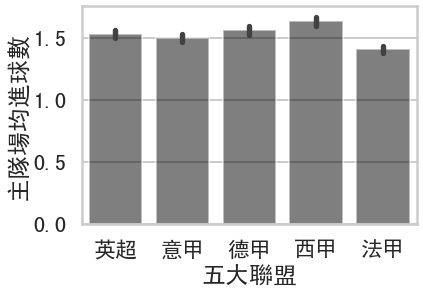

In [16]:
# 主隊場均進球數
sns.barplot(x=leagueList,  y=df["home_score"],color='black', alpha=0.5)
plt.ylabel('主隊場均進球數')
plt.xlabel('五大聯盟')

Text(0.5, 0, '五大聯盟')

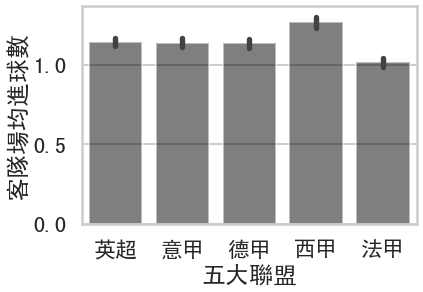

In [17]:
# 客隊場均進球數
sns.barplot(x=leagueList,  y=df["away_score"],color='black', alpha=0.5)
plt.ylabel('客隊場均進球數')
plt.xlabel('五大聯盟')

In [21]:
# 計算兩隊的總進球數
df['total_goal'] = df['home_score'] + df['away_score']

# 計算主隊與客隊之間的淨勝球
df['home_team_gd'] = df['home_score'] - df['away_score']

Text(0.5, 0, '五大聯盟')

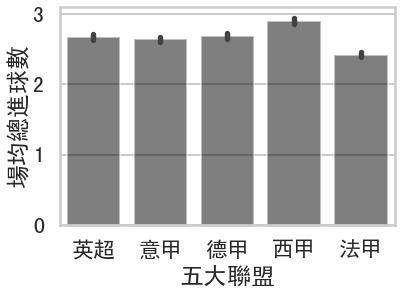

In [22]:
#場均總進球數
sns.barplot(x=leagueList,  y=df["total_goal"],color='black', alpha=0.5)
plt.ylabel('場均總進球數')
plt.xlabel('五大聯盟')

Text(0.5, 0, '五大聯盟')

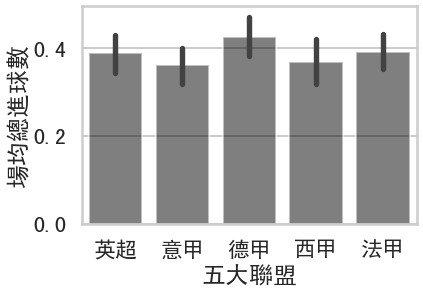

In [23]:
# 主客場均淨勝球
sns.barplot(x=leagueList,  y=df["home_team_gd"],color='black', alpha=0.5)
plt.ylabel('場均總進球數')
plt.xlabel('五大聯盟')

In [35]:
# 主隊進球平均
lambdaHome = df['home_score'].mean()
# 主隊最大進球數
homeMax = df['home_score'].max()

np.arange(homeMax + 1)*df.shape[0]

array([     0,  29396,  58792,  88188, 117584, 146980, 176376, 205772,
       235168, 264564, 293960])

In [32]:
poisson.pmf(np.arange(homeMax + 1), lambdaHome)*df.shape[0]

array([2.17761020e-01, 3.31945547e-01, 2.53001769e-01, 1.28555010e-01,
       4.89909343e-02, 1.49359353e-02, 3.79461638e-03, 8.26335750e-04,
       1.57453841e-04, 2.66684304e-05, 4.06522101e-06])

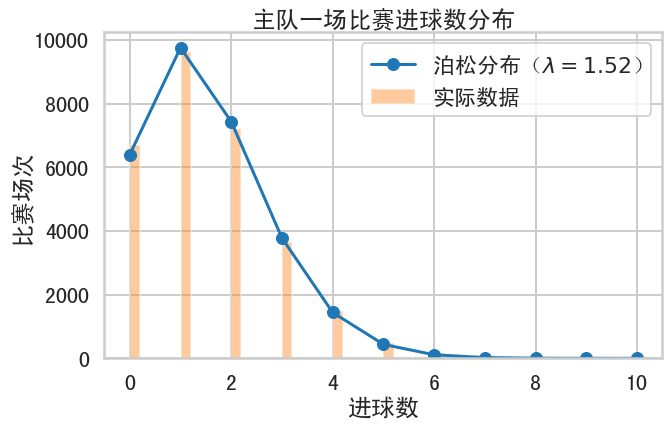

In [37]:


plt.figure(figsize=(10,6))
plt.plot(np.arange(11), poisson.pmf(np.arange(11), lambda_home)*df.shape[0], '-o', label="泊松分布（$\lambda={:.2f}$）".format(lambda_home))
sns.distplot(df['home_score'], kde=False, label='实际数据')
plt.xlabel('进球数')
plt.ylabel('比赛场次')
plt.title('主队一场比赛进球数分布')
plt.legend()

In [10]:
lambda_home

1.5243570553816845

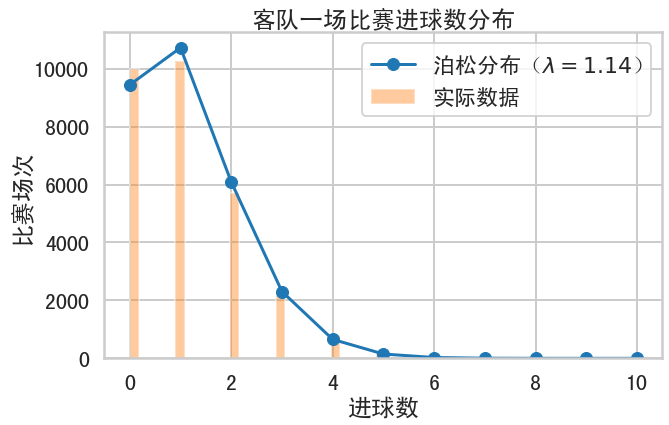

In [11]:
# 客队进球数分布
# Estimate lambda for home team goal
lambda_away=df['away_score'].mean()

plt.figure(figsize=(10,6))
plt.plot(np.arange(11), poisson.pmf(np.arange(11), lambda_away)*df.shape[0], '-o', label="泊松分布（$\lambda={:.2f}$）".format(lambda_away))
sns.distplot(df['away_score'], kde=False, label='实际数据')
plt.xlabel('进球数')
plt.ylabel('比赛场次')
plt.title('客队一场比赛进球数分布')
plt.legend()

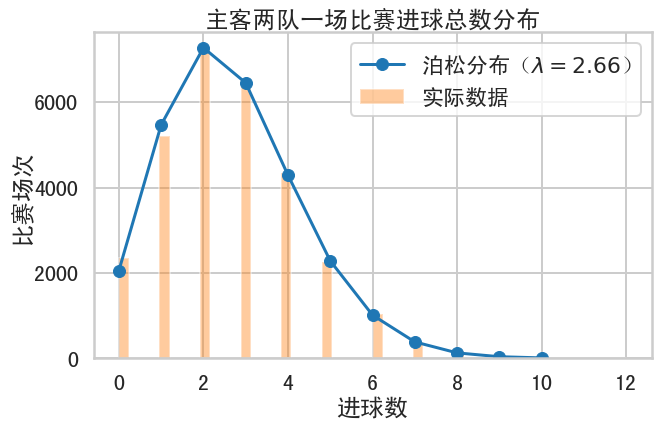

In [12]:
# 总进球数分布
# Estimate lambda for total goal
lambda_total=df['total_goal'].mean()

plt.figure(figsize=(10,6))
plt.plot(np.arange(11), poisson.pmf(np.arange(11), lambda_total)*df.shape[0], '-o', label="泊松分布（$\lambda={:.2f}$）".format(lambda_total))
sns.distplot(df['total_goal'],kde=False, label='实际数据')
plt.xlabel('进球数')
plt.ylabel('比赛场次')
plt.title('主客两队一场比赛进球总数分布')
plt.legend()
#plt.savefig('poisson_match_goal.jpg', dpi=400)

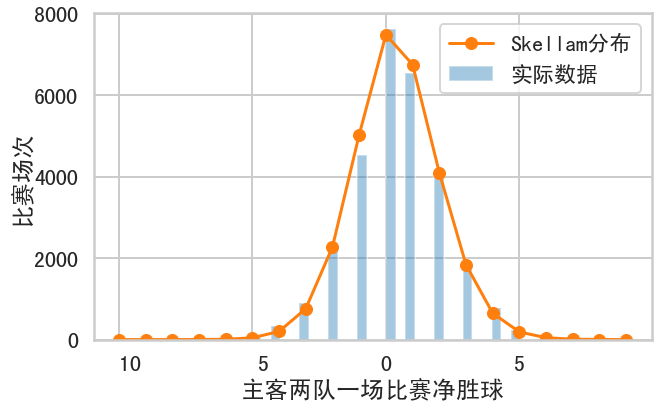

In [13]:
# 主队与客队之间的净胜球分布
# define goal difference range for plot
gd_range = np.arange(20) - 10   # -10 to 9

plt.figure(figsize=(10,6))
sns.distplot(df['home_team_gd'], kde=False, label='实际数据')
plt.plot(gd_range, skellam.pmf(gd_range, lambda_home, lambda_away)*df.shape[0], '-o', label="Skellam分布")
plt.xlabel('主客两队一场比赛净胜球')
plt.ylabel('比赛场次')
plt.legend()

In [14]:
# 比赛胜平负
# 对比赛结果进行编码
# 主队获胜：0
# 双方打平：1
# 客队获胜：2
df['result'] = np.where(df['home_team_gd'] > 0, 0, np.where(df['home_team_gd'] < 0, 2, 1))